In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, recall_score

In [19]:
sns.set()
%matplotlib inline

df = pd.read_csv('creditcard.csv')
print(df.shape)

(284807, 31)


In [20]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [22]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Class
Not Fraud    284315
Fraud           492
Name: count, dtype: int64


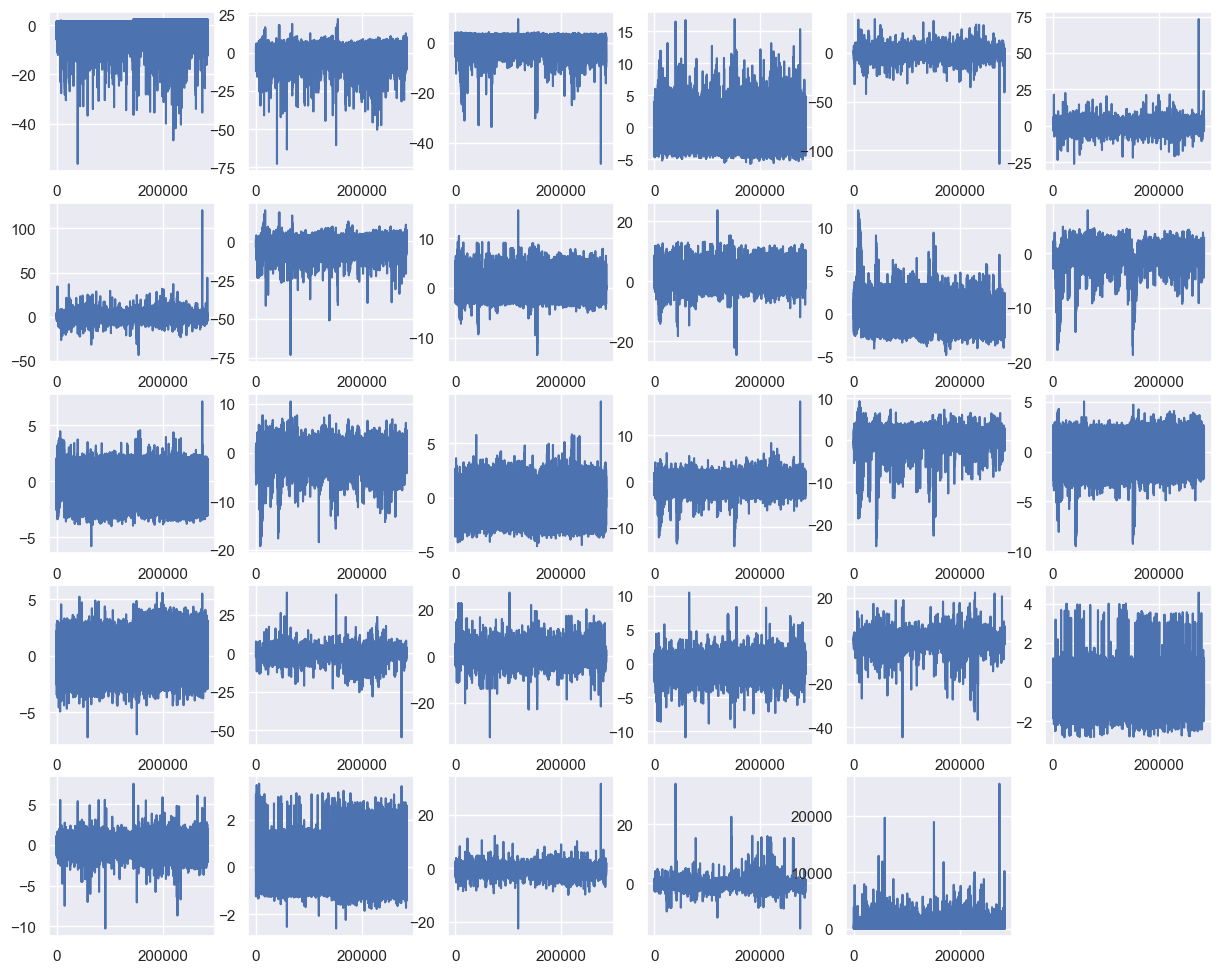

In [23]:
fig = plt.figure(figsize = (15, 12))

plt.subplot(5, 6, 1) ; plt.plot(df.V1) ; plt.subplot(5, 6, 15) ; plt.plot(df.V15)
plt.subplot(5, 6, 2) ; plt.plot(df.V2) ; plt.subplot(5, 6, 16) ; plt.plot(df.V16)
plt.subplot(5, 6, 3) ; plt.plot(df.V3) ; plt.subplot(5, 6, 17) ; plt.plot(df.V17)
plt.subplot(5, 6, 4) ; plt.plot(df.V4) ; plt.subplot(5, 6, 18) ; plt.plot(df.V18)
plt.subplot(5, 6, 5) ; plt.plot(df.V5) ; plt.subplot(5, 6, 19) ; plt.plot(df.V19)
plt.subplot(5, 6, 6) ; plt.plot(df.V6) ; plt.subplot(5, 6, 20) ; plt.plot(df.V20)
plt.subplot(5, 6, 7) ; plt.plot(df.V7) ; plt.subplot(5, 6, 21) ; plt.plot(df.V21)
plt.subplot(5, 6, 8) ; plt.plot(df.V8) ; plt.subplot(5, 6, 22) ; plt.plot(df.V22)
plt.subplot(5, 6, 9) ; plt.plot(df.V9) ; plt.subplot(5, 6, 23) ; plt.plot(df.V23)
plt.subplot(5, 6, 10) ; plt.plot(df.V10) ; plt.subplot(5, 6, 24) ; plt.plot(df.V24)
plt.subplot(5, 6, 11) ; plt.plot(df.V11) ; plt.subplot(5, 6, 25) ; plt.plot(df.V25)
plt.subplot(5, 6, 12) ; plt.plot(df.V12) ; plt.subplot(5, 6, 26) ; plt.plot(df.V26)
plt.subplot(5, 6, 13) ; plt.plot(df.V13) ; plt.subplot(5, 6, 27) ; plt.plot(df.V27)
plt.subplot(5, 6, 14) ; plt.plot(df.V14) ; plt.subplot(5, 6, 28) ; plt.plot(df.V28)
plt.subplot(5, 6, 29) ; plt.plot(df.Amount)
plt.show()

In [24]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30: ].columns
print(feature_names)
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [25]:
data_features = df[feature_names]
data_target = df[target]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size=0.70, test_size=0.30, random_state=1)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 199364
Length of X_test is: 85443
Length of y_train is: 199364
Length of y_test is: 85443


In [27]:
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

d:\Program Files\vsc programs\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
pred = model.predict(X_test)

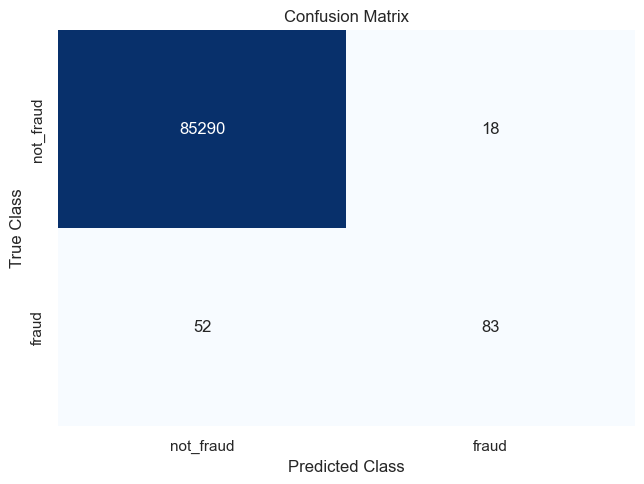

In [29]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [30]:

f1_score = round(f1_score(y_test, pred), 2)
recall_score = round(recall_score(y_test, pred), 2)
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Logistic Regression Model 1 : 0.61
F1 Score for Logistic Regression Model 1 : 0.7


In [31]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [32]:
# Load the saved model from the file
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [43]:
def predict_from_input():
    try:
        feature1 = float(input("Enter feature V1: "))
        feature2 = float(input("Enter feature V2: "))
        feature3 = float(input("Enter feature V3: "))
        feature4 = float(input("Enter feature V4: "))
        feature5 = float(input("Enter feature V5: "))
        feature6 = float(input("Enter feature V6: "))
        feature7 = float(input("Enter feature V7: "))
        feature8 = float(input("Enter feature V8: "))
        feature9 = float(input("Enter feature V9: "))
        feature10 = float(input("Enter feature V10: "))
        feature11 = float(input("Enter feature V11: "))
        feature12 = float(input("Enter feature V12: "))
        feature13 = float(input("Enter feature V13: "))
        feature14 = float(input("Enter feature V14: "))
        feature15 = float(input("Enter feature V15: "))
        feature16 = float(input("Enter feature V16: "))
        feature17 = float(input("Enter feature V17: "))
        feature18 = float(input("Enter feature V18: "))
        feature19 = float(input("Enter feature V19: "))
        feature20 = float(input("Enter feature V20: "))
        feature21 = float(input("Enter feature V21: "))
        feature22 = float(input("Enter feature V22: "))
        feature23 = float(input("Enter feature V23: "))
        feature24 = float(input("Enter feature V24: "))
        feature25 = float(input("Enter feature V25: "))
        feature26 = float(input("Enter feature V26: "))
        feature27 = float(input("Enter feature V27: "))
        feature28 = float(input("Enter feature V28: "))
        feature29 = float(input("Enter feature Amount: "))
        
        # Create the feature array for prediction
        features = np.array([[feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10, feature11, feature12, feature13, feature14, feature15, feature16, feature17, feature18, feature19, feature20, feature21, feature22, feature23, feature24, feature25, feature26, feature27, feature28, feature29]]) 
        
        concatenated_input = f"{feature1},{feature2},{feature3},{feature4}, {feature5}, {feature6}, {feature7}, {feature8}, {feature9}, {feature10}, {feature11}, {feature12}, {feature13}, {feature14}, {feature15}, {feature16}, {feature17}, {feature18}, {feature19}, {feature20}, {feature21}, {feature22}, {feature23}, {feature24}, {feature25}, {feature26}, {feature27}, {feature28}, {feature29}" 
        print(f"values: {concatenated_input}")

        # Make prediction
        prediction = loaded_model.predict(features)
        
        # Display the result
        print(f"Prediction: {prediction[0]}")
    except ValueError:
        print("Invalid input. Please enter valid float values for the features.")

In [ ]:
while True:
    predict_from_input()
    continue_prompt = input("Do you want to make another prediction? (yes/no): ").strip().lower()
    if continue_prompt != "yes":
        print("Exiting prediction interface.")
        break

d:\Program Files\vsc programs\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


values: 1.0,1.0,1.0,1.0, 1.0, 1.0, -1.0, -1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, -1.0, 6969.0
Prediction: 0
